# Classify Cats and Dogs Images with Deeplearning

---



# Import Libraries/Dataset

1. Import the required libraries and the dataset (use Google Drive if required).
2. Check the GPU available (recommended- use free GPU provided by Google Colab).


## 1. Import the required libraries and the dataset (use Google Drive if required).

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_datasets as tfds
import os,random,gc

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.pyplot import figure
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img
from keras.preprocessing.image import save_img
from keras.preprocessing.image import img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## 2. Check the GPU available (recommended- use free GPU provided by Google Colab).

In [ ]:
##list of physical devices visible to the host runtime.
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
## GPU available
!nvidia-smi

Tue Jul 13 14:01:24 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   64C    P8    10W /  70W |      3MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Data Visualization and augmentation

1. Plot at least two samples from each class of the dataset (use matplotlib/seaborn/any other library).
2. Apply horizontal flip and width shift augmentation (horizontal_flip, width_shift_range) to the dataset separately. Print the augmented image and the original image for each class and each augmentation.
3. Bring the train and test data in the required format.
4. Print the shapes of train and test data.


## 1. Plot at least two samples from each class of the dataset (use matplotlib/seaborn/any other library).

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
with zipfile.ZipFile('/content/drive/My Drive/dogs-cats-images/archive 2.zip', 'r') as zip_ref:
  zip_ref.extractall('/content') 

In [ ]:
train_dir='/content/archive/dog vs cat/dataset/training_set/'

In [ ]:
train_dogs=['/content/archive/dog vs cat/dataset/training_set/dogs/{}'.format(i) for i in os.listdir(train_dir+'/dogs') if ('dog') in i]
train_cats=['/content/archive/dog vs cat/dataset/training_set/cats/{}'.format(i) for i in os.listdir(train_dir+'/cats') if ('cat') in i]


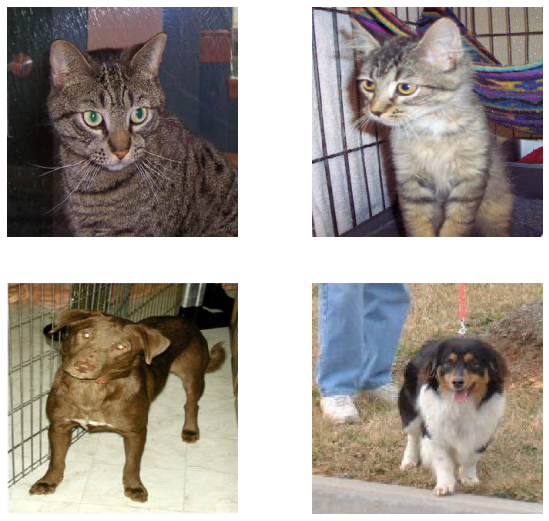

In [ ]:
from IPython.display import Image, display
path='/content/archive/dog vs cat/dataset/training_set/'
listOfImageNames = [path+'cats/cat.1.jpg',path+'cats/cat.2.jpg',
                    path+'dogs/dog.1.jpg',path+'dogs/dog.2.jpg']

#Samples from the given dataset

plt.figure(figsize=(10, 50))
i=1
for imageName in listOfImageNames:
    ax = plt.subplot(10, 2, i)
    img = image.load_img(imageName, target_size=(300,300,3))
    plt.imshow(img)
    plt.axis("off")
    i=i+1

## 2. Apply horizontal flip and width shift augmentation (horizontal_flip, width_shift_range) to the dataset separately. Print the augmented image and the original image for each class and each augmentation.

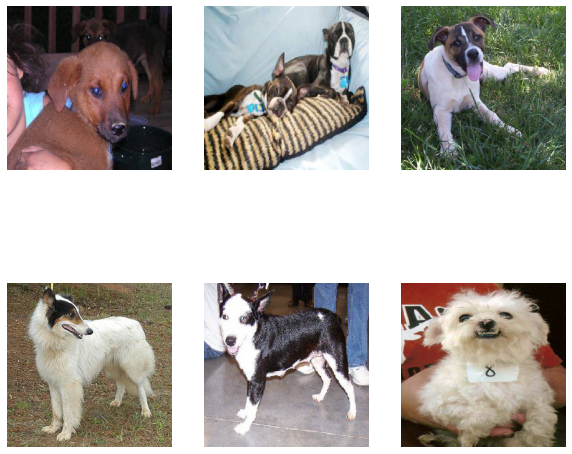

In [ ]:
from keras.preprocessing import image
plt.figure(figsize=(10, 50))
i=1
for imageName in train_dogs[:6]:
    ax = plt.subplot(10, 3, i)
    img = image.load_img(imageName, target_size=(300,300,3))
    plt.imshow(img)
    plt.axis("off")
    i=i+1

In [ ]:
os.mkdir('/content/archive/dog vs cat/dataset/training_set/hflip_dogs')

In [ ]:
os.mkdir('/content/archive/dog vs cat/dataset/training_set/hflip_cats')

In [ ]:

datagen = ImageDataGenerator(horizontal_flip=True)

for imageName in os.listdir('/content/archive/dog vs cat/dataset/training_set/dogs'):
    img =load_img('/content/archive/dog vs cat/dataset/training_set/dogs/'+imageName)
    img = np.expand_dims(img, axis=0)
    img = datagen.flow(img, batch_size=1)
    image = next(img)[0].astype('uint8')
    save_img('/content/archive/dog vs cat/dataset/training_set/hflip_dogs/'+imageName, image)


In [ ]:

datagen = ImageDataGenerator(horizontal_flip=True)

for imageName in os.listdir('/content/archive/dog vs cat/dataset/training_set/cats'):
    img =load_img('/content/archive/dog vs cat/dataset/training_set/cats/'+imageName)
    img = np.expand_dims(img, axis=0)
    img = datagen.flow(img, batch_size=1)
    image = next(img)[0].astype('uint8')
    save_img('/content/archive/dog vs cat/dataset/training_set/hflip_cats/'+imageName, image)

In [ ]:
len(os.listdir('/content/archive/dog vs cat/dataset/training_set/hflip_dogs'))

4000

In [ ]:
len(os.listdir('/content/archive/dog vs cat/dataset/training_set/hflip_cats'))

4000

In [ ]:
os.mkdir('/content/archive/dog vs cat/dataset/training_set/width_shift_dogs')

In [ ]:
os.mkdir('/content/archive/dog vs cat/dataset/training_set/width_shift_cats')

In [ ]:
datagen = ImageDataGenerator(width_shift_range=0.3)

for imageName in os.listdir('/content/archive/dog vs cat/dataset/training_set/dogs'):
    img =load_img('/content/archive/dog vs cat/dataset/training_set/dogs/'+imageName)
    img = np.expand_dims(img, axis=0)
    img = datagen.flow(img, batch_size=1)
    image = next(img)[0].astype('uint8')
    save_img('/content/archive/dog vs cat/dataset/training_set/width_shift_dogs/'+imageName, image)

In [ ]:
datagen = ImageDataGenerator(width_shift_range=0.3)

for imageName in os.listdir('/content/archive/dog vs cat/dataset/training_set/cats'):
    img =load_img('/content/archive/dog vs cat/dataset/training_set/cats/'+imageName)
    img = np.expand_dims(img, axis=0)
    img = datagen.flow(img, batch_size=1)
    image = next(img)[0].astype('uint8')
    save_img('/content/archive/dog vs cat/dataset/training_set/width_shift_cats/'+imageName, image)

In [ ]:
len(os.listdir('/content/archive/dog vs cat/dataset/training_set/width_shift_dogs'))

4000

In [ ]:
len(os.listdir('/content/archive/dog vs cat/dataset/training_set/width_shift_cats'))

4000

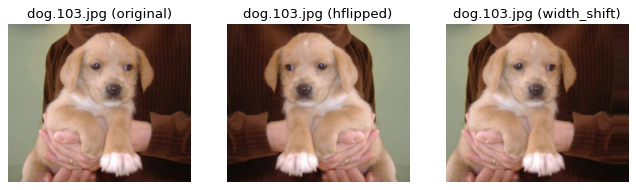

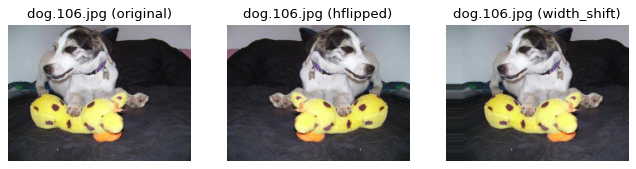

In [ ]:
#Getting the horizonal flipped and width shift images
for num in range(103,109,3):
    figure(figsize=(10, 10), dpi=80)
    imageName='dog.'+str(num)+'.jpg'
    dog1 =load_img('/content/archive/dog vs cat/dataset/training_set/dogs/'+imageName)
    dog2 =load_img('/content/archive/dog vs cat/dataset/training_set/hflip_dogs/'+imageName)
    dog3 =load_img('/content/archive/dog vs cat/dataset/training_set/width_shift_dogs/'+imageName)

    plt.subplot(131)
    plt.imshow(dog1)
    plt.title(imageName+ " (original)")
    plt.axis("off")

    plt.subplot(132)
    plt.imshow(dog2)
    plt.title(imageName+ " (hflipped)")
    plt.axis("off")

    plt.subplot(133)
    plt.imshow(dog3)
    plt.title(imageName+ " (width_shift)")
    plt.axis("off")

    plt.show()

## 3. Bring the train and test data in the required format.

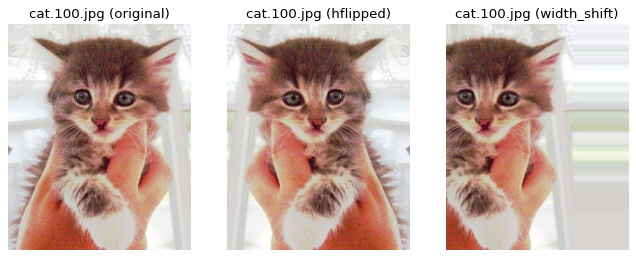

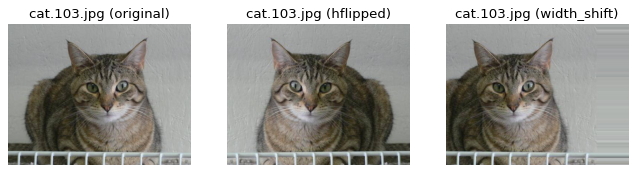

In [ ]:
#Getting the horizonal flipped and width shift images
for num in range(100,106,3):
    figure(figsize=(10, 10), dpi=80)
    imageName='cat.'+str(num)+'.jpg'
    cat1 =load_img('/content/archive/dog vs cat/dataset/training_set/cats/'+imageName)
    cat2 =load_img('/content/archive/dog vs cat/dataset/training_set/hflip_cats/'+imageName)
    cat3 =load_img('/content/archive/dog vs cat/dataset/training_set/width_shift_cats/'+imageName)

    plt.subplot(131)
    plt.imshow(cat1)
    plt.title(imageName+ " (original)")
    plt.axis("off")

    plt.subplot(132)
    plt.imshow(cat2)
    plt.title(imageName+ " (hflipped)")
    plt.axis("off")

    plt.subplot(133)
    plt.imshow(cat3)
    plt.title(imageName+ " (width_shift)")
    plt.axis("off")

    plt.show()

In [ ]:
train_dir='/content/archive/dog vs cat/dataset/training_set/'
test_dir='/content/archive/dog vs cat/dataset/test_set/'

train_dogs=['/content/archive/dog vs cat/dataset/training_set/dogs/{}'.format(i) for i in os.listdir(train_dir+'/dogs') if ('dog') in i]
train_cats=['/content/archive/dog vs cat/dataset/training_set/cats/{}'.format(i) for i in os.listdir(train_dir+'/cats') if ('cat') in i]

train_hdogs=['/content/archive/dog vs cat/dataset/training_set/hflip_dogs/{}'.format(i) for i in os.listdir(train_dir+'/dogs') if ('dog') in i]
train_hcats=['/content/archive/dog vs cat/dataset/training_set/hflip_cats/{}'.format(i) for i in os.listdir(train_dir+'/cats') if ('cat') in i]


train_width_dogs=['/content/archive/dog vs cat/dataset/training_set/width_shift_dogs/{}'.format(i) for i in os.listdir(train_dir+'/dogs') if ('dog') in i]
train_width_cats=['/content/archive/dog vs cat/dataset/training_set/width_shift_cats/{}'.format(i) for i in os.listdir(train_dir+'/cats') if ('cat') in i]


test_dogs=['/content/archive/dog vs cat/dataset/test_set/dogs/{}'.format(i) for i in os.listdir(test_dir+'/dogs') if ('dog') in i]
test_cats=['/content/archive/dog vs cat/dataset/test_set/cats/{}'.format(i) for i in os.listdir(test_dir+'/cats') if ('cat') in i]

train_imgs=train_dogs+train_hdogs+train_width_dogs+train_cats+train_hcats+train_width_cats
random.shuffle(train_imgs)
test_imgs=test_dogs+test_cats
random.shuffle(test_imgs)

del train_dogs
del test_dogs
del train_cats
del test_cats

gc.collect()

42397

In [ ]:
len(train_imgs)

24000

In [ ]:
len(test_imgs)

2000

In [ ]:
#Getting the shapes of image sets
from keras.preprocessing import image
def load_and_tranform_images(image_list):
    rows=64
    cols=64
    colors=1
    X=[]
    y=[]
    for imag in image_list:
        img = image.load_img(imag, target_size=(rows,cols,colors),color_mode = "grayscale")
        img = image.img_to_array(img)
        img = img/255
        img_1d = img.reshape(rows*cols*colors)
        X.append(img_1d)
        
        if 'dog.' in imag:
            y.append(1)
        elif 'cat.' in imag:
            y.append(0)
    return X,y

In [ ]:
X,y=load_and_tranform_images(train_imgs)

In [ ]:
X=np.array(X)
y=np.array(y)

##4. Print the shapes of train and test data

In [ ]:
print('shape of train images:',X.shape)
print('shape of labels:',y.shape)

shape of train images: (24000, 4096)
shape of labels: (24000,)


In [ ]:
print('shape of test images:',X_test.shape)
print('shape of test labels:',y_test.shape)

shape of test images: (2000, 4096)
shape of test labels: (2000,)


# Model Building

1. Sequential Model layers- Use AT LEAST 3 hidden layers with appropriate input for each. Choose the best number for hidden units and give reasons.
2. Add L2 regularization to all the layers.
3. Add one layer of dropout at the appropriate position and give reasons.
4. Choose the appropriate activation function for all the layers.
5. Print the model summary.


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.2,random_state=2)

print('shape of train images:',X_train.shape)
print('shape of validation images:',X_val.shape)
print('shape of train labels:',y_train.shape)
print('shape of test labels:',y_val.shape)

shape of train images: (19200, 4096)
shape of validation images: (4800, 4096)
shape of train labels: (19200,)
shape of test labels: (4800,)


In [ ]:
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(tf.keras.layers.Dropout(0.3))
model.add(Dense(128, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(l=0.001)))
model.add(Dense(64, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(l=0.001)))
model.add(Dense(32, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(l=0.001)))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 256)               1048832   
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_12 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_13 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 33        
Total params: 1,092,097
Trainable params: 1,092,097
Non-trainable params: 0
____________________________________________

Reason for choosing Hidden units:
**bold text**
| Number of Hidden Layers | Result |

0 - Only capable of representing linear separable functions or decisions.

1 - Can approximate any function that contains a continuous mapping from one finite space to another.

2 - Can represent an arbitrary decision boundary to arbitrary accuracy with rational activation functions and can approximate any smooth mapping to any accuracy.

There are many rule-of-thumb methods for determining the correct number of neurons to use in the hidden layers, such as the following:

The number of hidden neurons should be between the size of the input layer and the size of the output layer.

The number of hidden neurons can be reduced by half each layer.

The number of hidden neurons should be less than twice the size of the input layer.


**Reason for putting dropout just after the pre-trained vector.**

Usually, dropout is placed on the fully connected layers only because they are the one with the greater number of parameters and thus they're likely to excessively co-adapting themselves causing overfitting

**Choice of Activation functions:**

We have used relu, in all the hidden layers because rectified linear activation function overcomes the vanishing gradient problem, allowing models to learn faster and perform better.

In the output layer, we want Binary classification output so we have used sigmoid.

# Model Compilation

1. Compile the model with the appropriate loss function.
2. Use an appropriate optimizer. Give reasons for the choice of learning rate and its value.
3. Use accuracy as a metric.


In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(
  optimizer=opt,
  loss='binary_crossentropy',
  metrics=['accuracy'])

Despite Adam is and adaptive optimizer, and it learns the learning rates itself, on a per-parameter basis. So we are not specifying learning rate, Here Learning rate is determined by iterative process, by repeated evaluations via linear search or log linear search. 


# Model Training

1. Train the model for an appropriate number of epochs. Print the train and validation accuracy and loss for each epoch. Use the appropriate batch size.
2. Plot the loss and accuracy history graphs for both train and validation set. Print the total time taken for training.


## 1. Train the model for an appropriate number of epochs. Print the train and validation accuracy and loss for each epoch. Use the appropriate batch size. Print the total time taken for training.

In [ ]:
import time
t = time.time()
history = model.fit(X_train, y_train, batch_size=128, epochs=50, verbose=1,validation_data=(X_val, y_val))

print ("Total training time: ",time.time() - t)

Epoch 1/50
150/150 [==============================] - 1s 5ms/step - loss: 0.9727 - accuracy: 0.5324 - val_loss: 0.9385 - val_accuracy: 0.5883
Epoch 2/50
150/150 [==============================] - 1s 5ms/step - loss: 0.9273 - accuracy: 0.5710 - val_loss: 0.9166 - val_accuracy: 0.5565
Epoch 3/50
150/150 [==============================] - 1s 4ms/step - loss: 0.8945 - accuracy: 0.5866 - val_loss: 0.8739 - val_accuracy: 0.6002
Epoch 4/50
150/150 [==============================] - 1s 4ms/step - loss: 0.8678 - accuracy: 0.5935 - val_loss: 0.8506 - val_accuracy: 0.6123
Epoch 5/50
150/150 [==============================] - 1s 4ms/step - loss: 0.8475 - accuracy: 0.5988 - val_loss: 0.8336 - val_accuracy: 0.6054
Epoch 6/50
150/150 [==============================] - 1s 4ms/step - loss: 0.8292 - accuracy: 0.5994 - val_loss: 0.8177 - val_accuracy: 0.6117
Epoch 7/50
150/150 [==============================] - 1s 4ms/step - loss: 0.8124 - accuracy: 0.6081 - val_loss: 0.8032 - val_accuracy: 0.6125
Epoch 

## 2. Plot the loss and accuracy history graphs for both train and validation set.


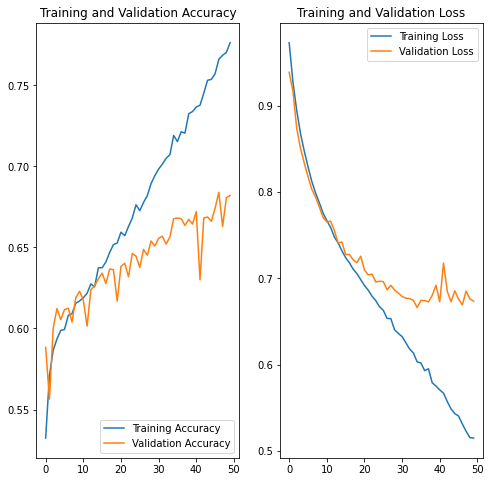

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(50)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Model Evaluation

1. Print the final train and validation loss and accuracy. Print confusion matrix and classification report for the validation dataset. Analyse and report the best and worst performing class.
2. Print the two most incorrectly classified images for each class in the test dataset.


## 1. Print the final train and validation loss and accuracy. Print confusion matrix and classification report for the validation dataset. Analyse and report the best and worst performing class.

In [ ]:
model.evaluate(X_val, y_val)

150/150 [==============================] - 0s 2ms/step - loss: 0.6735 - accuracy: 0.6821


[0.6735464334487915, 0.6820833086967468]

In [ ]:
print('Final training loss : {}'.format(history.history['loss'][-1]))
print('Final training accuracy : {}'.format(history.history['accuracy'][-1]))
print('Final validation loss : {}'.format(history.history['val_loss'][-1])) 
print('Final validation accuracy : {}'.format(history.history['val_accuracy'][-1]))

Final training loss : 0.5151374936103821
Final training accuracy : 0.7762500047683716
Final validation loss : 0.673546314239502
Final validation accuracy : 0.6820833086967468


In [ ]:
predictions = model.predict(X_val)

prediction_0_1 = lambda x: 1 if x > 0.5 else 0
vfunc = np.vectorize(prediction_0_1)
y_pred=vfunc(predictions)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val, y_pred)
print(cm)

from sklearn.metrics import classification_report
print(classification_report(y_val, y_pred))

[[1712  671]
 [ 855 1562]]
              precision    recall  f1-score   support

           0       0.67      0.72      0.69      2383
           1       0.70      0.65      0.67      2417

    accuracy                           0.68      4800
   macro avg       0.68      0.68      0.68      4800
weighted avg       0.68      0.68      0.68      4800



## 2.Print the two most incorrectly classified images for each class in the test dataset.

In [ ]:
count =0
for x in range(0,y_val.shape[0]):
  #print(y_val[x],y_pred[x])
  if(y_val[x] != y_pred[x]):
    print(x,y_val[x],y_pred[x])
    count = count+1
    if count >=10:
      break

6 0 [1]
7 0 [1]
10 1 [0]
11 1 [0]
18 1 [0]
20 0 [1]
21 0 [1]
24 1 [0]
25 1 [0]
31 1 [0]


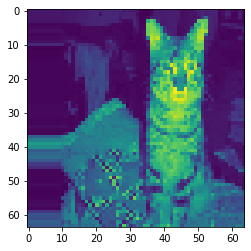

In [ ]:
# The below image is classified as Dog by the Model
image1 = np.reshape(X_val[20], (64, 64))
plt.imshow(image1)
plt.show()

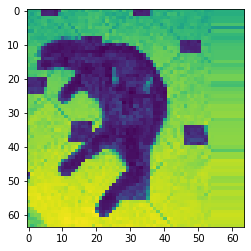

In [ ]:
# The below image is classified as Dog by the Model
image2 = np.reshape(X_val[21], (64, 64))
plt.imshow(image2)
plt.show()

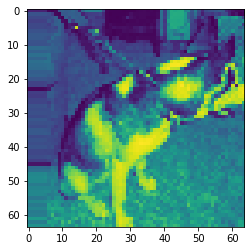

In [ ]:
# The below image is classified as cat by the Model
image2 = np.reshape(X_val[24], (64, 64))
plt.imshow(image2)
plt.show()

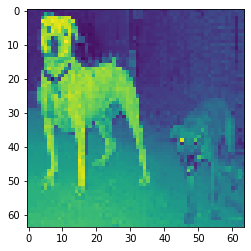

In [ ]:
# The below image is classified as cat by the Model
image2 = np.reshape(X_val[25], (64, 64))
plt.imshow(image2)
plt.show()

# Hyperparameter Tuning- Build two more additional models by changing the following hyperparameters ONE at a time. Write the code for Model Building, Model Compilation, Model Training and Model Evaluation as given in the instructions above for each additional model.

1. Network Depth: Change the number of hidden layers and hidden units for each layer
2. Optimizer: Use a different optimizer with the appropriate LR value

Write a comparison between each model and give reasons for the difference in results.

## Modified Model 1 - Network Depth: Change the number of hidden layers and hidden units for each layer

In [ ]:
import gc
tf.keras.backend.clear_session()
gc.collect()

2574

In [ ]:
model1 = Sequential()
model1.add(Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model1.add(tf.keras.layers.Dropout(0.3))
model1.add(Dense(128, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(l=0.001)))
model1.add(Dense(128, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(l=0.001)))
model1.add(Dense(128, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(l=0.001)))
model1.add(Dense(128, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(l=0.001)))
model1.add(Dense(64, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(l=0.001)))
model1.add(Dense(32, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(l=0.001)))
model1.add(Dense(1, activation='sigmoid'))

In [ ]:
opt1 = tf.keras.optimizers.Adam(learning_rate=0.0001)

model1.compile(
  optimizer=opt1,
  loss='binary_crossentropy',
  metrics=['accuracy'])

In [ ]:
import time
t = time.time()
history1 = model1.fit(X_train, y_train, batch_size=128, epochs=50, verbose=1,validation_data=(X_val, y_val))

print ("Total training time: ",time.time() - t)

Epoch 1/50
150/150 [==============================] - 1s 5ms/step - loss: 1.3066 - accuracy: 0.5275 - val_loss: 1.2388 - val_accuracy: 0.5696
Epoch 2/50
150/150 [==============================] - 1s 4ms/step - loss: 1.1927 - accuracy: 0.5564 - val_loss: 1.1493 - val_accuracy: 0.5575
Epoch 3/50
150/150 [==============================] - 1s 4ms/step - loss: 1.1046 - accuracy: 0.5775 - val_loss: 1.0641 - val_accuracy: 0.5960
Epoch 4/50
150/150 [==============================] - 1s 4ms/step - loss: 1.0372 - accuracy: 0.5823 - val_loss: 1.0027 - val_accuracy: 0.6004
Epoch 5/50
150/150 [==============================] - 1s 5ms/step - loss: 0.9821 - accuracy: 0.5910 - val_loss: 0.9614 - val_accuracy: 0.5898
Epoch 6/50
150/150 [==============================] - 1s 4ms/step - loss: 0.9390 - accuracy: 0.6007 - val_loss: 0.9181 - val_accuracy: 0.6000
Epoch 7/50
150/150 [==============================] - 1s 4ms/step - loss: 0.9050 - accuracy: 0.5982 - val_loss: 0.8886 - val_accuracy: 0.5985
Epoch 

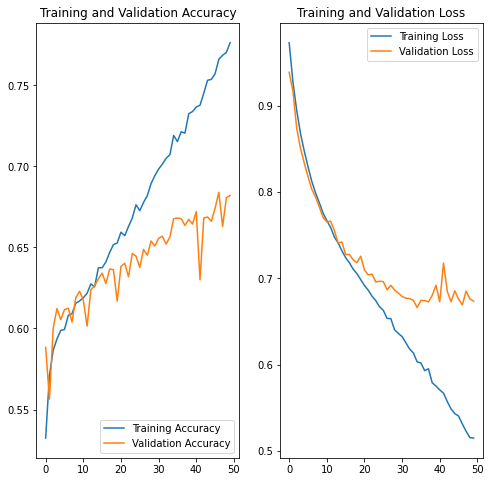

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(50)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
model1.evaluate(X_val, y_val)

150/150 [==============================] - 0s 2ms/step - loss: 0.6955 - accuracy: 0.6817


[0.6954739093780518, 0.6816666722297668]

In [ ]:
print('Final training loss : {}'.format(history.history['loss'][-1]))
print('Final training accuracy : {}'.format(history.history['accuracy'][-1]))
print('Final validation loss : {}'.format(history.history['val_loss'][-1])) 
print('Final validation accuracy : {}'.format(history.history['val_accuracy'][-1]))

Final training loss : 0.5151374936103821
Final training accuracy : 0.7762500047683716
Final validation loss : 0.673546314239502
Final validation accuracy : 0.6820833086967468


In [ ]:
predictions = model1.predict(X_val)

prediction_0_1 = lambda x: 1 if x > 0.5 else 0
vfunc = np.vectorize(prediction_0_1)
y_pred=vfunc(predictions)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val, y_pred)
print(cm)

from sklearn.metrics import classification_report
print(classification_report(y_val, y_pred))

[[1647  736]
 [ 792 1625]]
              precision    recall  f1-score   support

           0       0.68      0.69      0.68      2383
           1       0.69      0.67      0.68      2417

    accuracy                           0.68      4800
   macro avg       0.68      0.68      0.68      4800
weighted avg       0.68      0.68      0.68      4800



## Modified Model 2 - Optimizer: Use a different optimizer with the appropriate LR value


In [ ]:
import gc
tf.keras.backend.clear_session()
gc.collect()

15346

In [ ]:
model2 = Sequential()
model2.add(Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model2.add(tf.keras.layers.Dropout(0.3))
model2.add(Dense(128, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(l=0.001)))
model2.add(Dense(64, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(l=0.001)))
model2.add(Dense(32, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(l=0.001)))
model2.add(Dense(1, activation='sigmoid'))

In [ ]:
opt2 = tf.keras.optimizers.Adamax(learning_rate=0.01)

model2.compile(
  optimizer=opt2,
  loss='binary_crossentropy',
  metrics=['accuracy'])

In [ ]:
import time
t = time.time()
history2 = model2.fit(X_train, y_train, batch_size=128, epochs=50, verbose=1,validation_data=(X_val, y_val))

print ("Total training time: ",time.time() - t)

Epoch 1/50
150/150 [==============================] - 1s 5ms/step - loss: 1.2036 - accuracy: 0.5019 - val_loss: 0.8495 - val_accuracy: 0.4965
Epoch 2/50
150/150 [==============================] - 1s 4ms/step - loss: 0.8410 - accuracy: 0.5050 - val_loss: 0.8339 - val_accuracy: 0.5031
Epoch 3/50
150/150 [==============================] - 1s 4ms/step - loss: 0.8290 - accuracy: 0.5007 - val_loss: 0.8236 - val_accuracy: 0.5063
Epoch 4/50
150/150 [==============================] - 1s 4ms/step - loss: 0.8196 - accuracy: 0.5044 - val_loss: 0.8158 - val_accuracy: 0.4965
Epoch 5/50
150/150 [==============================] - 1s 4ms/step - loss: 0.8117 - accuracy: 0.5028 - val_loss: 0.8077 - val_accuracy: 0.5181
Epoch 6/50
150/150 [==============================] - 1s 4ms/step - loss: 0.8046 - accuracy: 0.5033 - val_loss: 0.8008 - val_accuracy: 0.5173
Epoch 7/50
150/150 [==============================] - 1s 4ms/step - loss: 0.7979 - accuracy: 0.5003 - val_loss: 0.7944 - val_accuracy: 0.5102
Epoch 

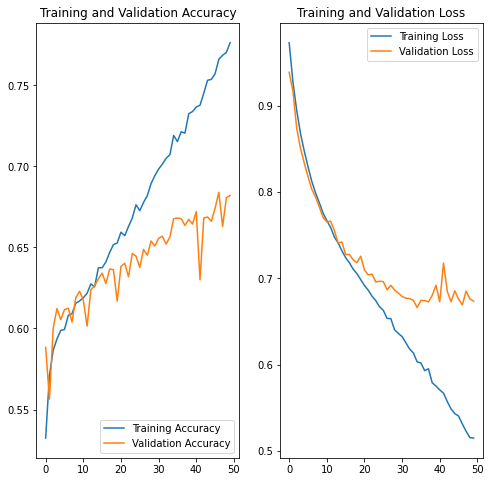

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(50)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
model2.evaluate(X_val, y_val)

150/150 [==============================] - 0s 2ms/step - loss: 0.6400 - accuracy: 0.6367


[0.6399908661842346, 0.6366666555404663]

In [ ]:
print('Final training loss : {}'.format(history.history['loss'][-1]))
print('Final training accuracy : {}'.format(history.history['accuracy'][-1]))
print('Final validation loss : {}'.format(history.history['val_loss'][-1])) 
print('Final validation accuracy : {}'.format(history.history['val_accuracy'][-1]))

Final training loss : 0.5151374936103821
Final training accuracy : 0.7762500047683716
Final validation loss : 0.673546314239502
Final validation accuracy : 0.6820833086967468


In [ ]:
predictions = model2.predict(X_val)

prediction_0_1 = lambda x: 1 if x > 0.5 else 0
vfunc = np.vectorize(prediction_0_1)
y_pred=vfunc(predictions)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val, y_pred)
print(cm)

from sklearn.metrics import classification_report
print(classification_report(y_val, y_pred))

[[1519  864]
 [ 880 1537]]
              precision    recall  f1-score   support

           0       0.63      0.64      0.64      2383
           1       0.64      0.64      0.64      2417

    accuracy                           0.64      4800
   macro avg       0.64      0.64      0.64      4800
weighted avg       0.64      0.64      0.64      4800



## Write a comparison between each model and give reasons for the difference in results.

In [ ]:

Base Model:

--> F1 : 0.68




Model 1:

--> F1 : 0.68




Model 2:

--> F1 : 0.64

Base model is the best among these three based on the F1-score.
You can see that Base Model and Model 1 F1- scores are same. We have increased the complexity of the Model 1
by increasing the no of trainable parameters.
We feel that Model 1 is a better model as it is less complex.